In [48]:
import numpy as np

matrix = np.array([[0.3, 0.4, 0.3],
                   [0.2, 0.5, 0.3],
                   [0.4, 0.3, 0.3]])

start_pos = [0, 1, 0]

final_pos = (start_pos @ matrix @ matrix)[0]

print(final_pos)

0.28


In [49]:
# Part 2

'''
There exist two ways:

a = suburb -> suburb -> downtown
b = suburb -> countryside -> downtown
'''
a = 1 * 0.5 * 0.2
b = 1 * 0.3 * 0.4

# Fill in the answer to part 2 below as a decimal number
problem1_p2 = a + b
print(problem1_p2)

0.22


In [50]:
# Part 3
'''
To check for irreducibility, raise the matrix to a high power
and check for convergence. No elements should approach 0.
'''

matrix_inf = np.linalg.matrix_power(matrix, 100)
print(matrix_inf)

# Fill in the answer to part 3 below as a boolean
problem1_irreducible = True

[[0.28888889 0.41111111 0.3       ]
 [0.28888889 0.41111111 0.3       ]
 [0.28888889 0.41111111 0.3       ]]


In [51]:
# Part 4

def stat_distr(p):
    A = p.T - np.eye(p.shape[0])
    b = np.zeros(p.shape[0])

    A[-1] = 1
    b[-1] = 1

    return np.linalg.solve(A, b)


problem1_stationary = stat_distr(matrix)
print(problem1_stationary)



[0.28888889 0.41111111 0.3       ]


**Problem 2**

In [52]:
# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file
# data/abalone.csv

import pandas as pd

data = pd.read_csv("data_2/abalone.csv")

Y = data["Rings"]
X = data.drop(columns=["Rings", "Sex"])
X = pd.concat([pd.get_dummies(data["Sex"], dtype=int), X], axis=1)

problem2_df = data

In [53]:
# Part 1
# Fill in the features as a list of strings of the names of the columns
problem2_features = X.columns
# Fill in the target as a string with the correct column name
problem2_target = "Rings"

In [54]:
# Part 2
# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42

from sklearn.model_selection import train_test_split

problem2_X_train, problem2_X_test, problem2_y_train, problem2_y_test = train_test_split(X, Y, train_size=0.8,
                                                                                        random_state=42)

In [55]:
# Part 3
# Include the necessary imports
# Initialize your linear regression model

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([("Regressor", LinearRegression())])

pipeline.fit(problem2_X_train, problem2_y_train)

problem2_y_pred = pipeline.predict(problem2_X_test)

problem2_model = pipeline
# Train your model on the training data

MAE: 1.5931067816608344
R2: 0.5481628137889278


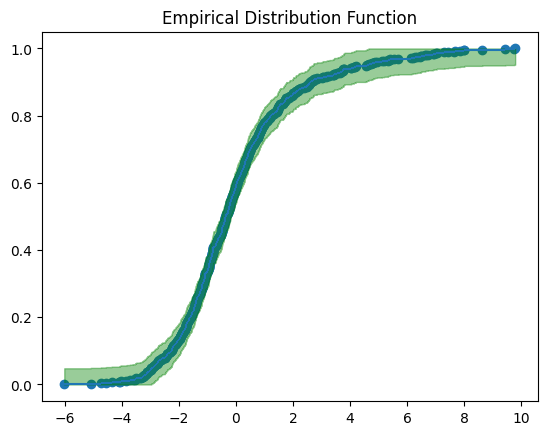

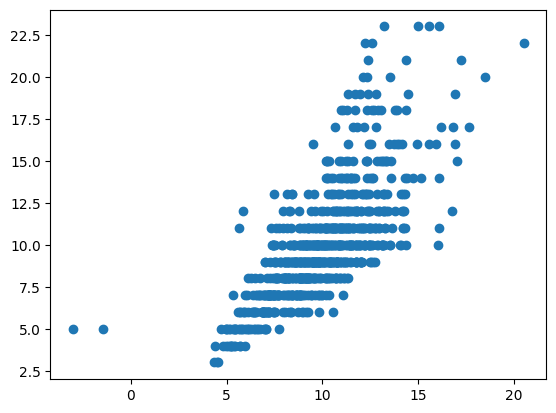

In [56]:
# Part 4
# Evaluate the model by computing the mean absolute error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import Utils as u
import matplotlib.pyplot as plt

problem2_mae = mean_absolute_error(problem2_y_test, problem2_y_pred)
print("MAE:", problem2_mae)
print("R2:", r2_score(problem2_y_test, problem2_y_pred))

u.plotEDF(u.makeEDF(problem2_y_test - problem2_y_pred), confidence_band=True, alpha=0.95)

plt.scatter(problem2_y_pred, problem2_y_test)

**Problem 3**

In [57]:
import pandas as pd

# Part 1
# Let problem3_df be the pandas dataframe that contains the data from the file
# data/visits_clean.csv

problem3_df = pd.read_csv("data_2/visits_clean.csv", sep='\s+')

In [58]:
# Part 1

data_features = problem3_df.drop(columns=["ofp", "ofnp", "opnp", ], axis=1)

# Fill in the features as a list of strings of the names of the columns
problem3_features = data_features.columns

# Fill in the target as a string with the correct column name
problem3_target = "ofp"

In [59]:
from sklearn.model_selection import train_test_split

# Part 2

# Fill in your X and y below
problem3_X = problem3_df[problem3_features].to_numpy()
problem3_y = problem3_df[problem3_target].to_numpy()

# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42
problem3_X_train, problem3_X_test, problem3_y_train, problem3_y_test = train_test_split(problem3_X, problem3_y,
                                                                                        train_size=0.8, random_state=42)

In [60]:
# Part 3
# Fill in the function loss below
class PoissonRegression(object):

    def __init__(self):
        self.coeffs = None
        self.result = None

    def fit(self, X, Y):
        import numpy as np
        from scipy import optimize
        import scipy.special as sc

        # define the objective/cost/loss function we want to minimise

        def loss(coeffs):
            # The parameter lambda for the given X and the proposed values
            # of the coefficients, here coeff[:-1] represent alpha
            # and coeff[-1] represent beta
            lam = np.exp(np.dot(X, coeffs[:-1]) + coeffs[-1])
            # use the Y variable that is available here to define
            # the loss function, return the value of the loss for
            # this Y and for this parameter lam defined above

            f = ((lam ** Y) * (np.exp(-lam))) / np.exp(sc.gammaln(Y + 1))
            positive_likelihoods = f[f > 1e-10]  #filter zeros

            negative_log_likelihood = -np.sum(np.log(positive_likelihoods))

            return negative_log_likelihood

        #Use the loss above together with an optimization method from scipy
        #to find the coefficients of the model
        #this is prepared for you below

        initial_arguments = np.zeros(shape=X.shape[1] + 1)  # initial guess as 0
        self.result = optimize.minimize(loss, initial_arguments, method='cg')
        self.coeffs = self.result.x

    def predict(self, X):
        #Use the trained model to predict Y
        if (self.coeffs is not None):
            return np.exp(np.dot(X, self.coeffs[:-1]) + self.coeffs[-1])

In [61]:
# Part 4
# Initialize your PoissonRegression model
problem3_model = PoissonRegression()

problem3_model.fit(problem3_X_train, problem3_y_train)
problem3_y_pred = problem3_model.predict(problem3_X_test)
# Fit your initialized model on the training data
# This is to make sure that everything went well,
# check that success is True
print(problem3_model.result)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -0.0
       x: [ 4.820e-02  2.371e-02 ...  6.936e-03  7.533e-02]
     nit: 1
     jac: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
    nfev: 40
    njev: 2


/var/folders/57/pvy_qq0515vbvpthzvkgfwfh0000gn/T/ipykernel_32315/716863728.py:25: RuntimeWarning: overflow encountered in power
  f = ((lam ** Y) * (np.exp(-lam))) / np.exp(sc.gammaln(Y + 1))
/var/folders/57/pvy_qq0515vbvpthzvkgfwfh0000gn/T/ipykernel_32315/716863728.py:25: RuntimeWarning: invalid value encountered in multiply
  f = ((lam ** Y) * (np.exp(-lam))) / np.exp(sc.gammaln(Y + 1))
